In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('df.csv',low_memory=False)

In [4]:
df.describe()

,Info_pos,Info_host_id,Info_group,Class,feat_Entropy,feat_MolWeight,feat_AAtypes_Tiny,feat_AAtypes_Small,feat_AAtypes_Aliphatic,feat_AAtypes_Aromatic,...,feat_esm2_1271,feat_esm2_1272,feat_esm2_1273,feat_esm2_1274,feat_esm2_1275,feat_esm2_1276,feat_esm2_1277,feat_esm2_1278,feat_esm2_1279,feat_esm2_1280
count,45000.000000,45000.0,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,319.781111,9606.0,129.960289,-0.985244,2.963995,1883.791208,0.354167,0.574204,0.280793,0.072588,...,0.038835,0.014660,-0.053453,0.028602,-0.046709,-0.041111,0.062953,-0.043011,0.052560,0.093800
std,275.101398,0.0,100.204808,0.171155,0.385034,148.303010,0.159486,0.175301,0.152201,0.079166,...,0.152642,0.139088,0.129500,0.154066,0.134989,0.153164,0.140340,0.153867,0.167224,0.150673
min,1.000000,9606.0,9.000000,-1.000000,0.699843,1198.130000,0.000000,0.000000,0.000000,0.000000,...,-0.702291,-0.777684,-0.711707,-0.534939,-0.776880,-0.822042,-0.581313,-0.840151,-0.791998,-0.601091
25%,120.000000,9606.0,42.000000,-1.000000,2.789898,1788.850000,0.266667,0.466667,0.200000,0.000000,...,-0.056009,-0.066439,-0.130491,-0.077223,-0.132446,-0.141362,-0.029193,-0.135852,-0.053991,-0.003531
50%,243.000000,9606.0,103.000000,-1.000000,3.006239,1886.910000,0.333333,0.600000,0.266667,0.066667,...,0.043914,0.023128,-0.050389,0.021100,-0.045311,-0.039615,0.064743,-0.036643,0.059092,0.095492
75%,424.000000,9606.0,191.000000,-1.000000,3.189898,1986.180000,0.466667,0.666667,0.333333,0.133333,...,0.141148,0.106192,0.028364,0.125858,0.037470,0.057832,0.156408,0.056991,0.166234,0.190922
max,1658.000000,9606.0,376.000000,1.000000,3.906891,2415.760000,1.000000,1.000000,1.000000,0.533333,...,0.765174,0.604259,0.616022,0.894539,0.682663,0.793851,0.754429,0.672107,0.716797,0.896703


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Columns: 1650 entries, Info_PepID to feat_esm2_1280
dtypes: float64(1628), int64(11), object(11)
memory usage: 566.5+ MB


In [6]:
df.isnull().sum().sum()

0

In [1]:
print(f"Dataset shape: {df.shape}")
feat_cols = [col for col in df.columns if col.startswith('feat_')]
info_cols = [col for col in df.columns if col.startswith('Info_')]
print(f"Features: {len(feat_cols)}, Info columns: {len(info_cols)}")

NameError: name 'df' is not defined

-1    44668
 1      332
Name: Class, dtype: int64


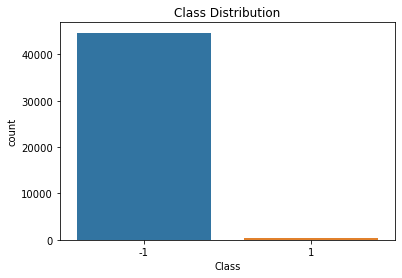

In [7]:
class_counts = df['Class'].value_counts()
print(class_counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [8]:
feat_cols = [col for col in df.columns if col.startswith('feat_')]
df[feat_cols].describe().T  # Summary statistics

,count,mean,std,min,25%,50%,75%,max
feat_Entropy,45000.0,2.963995,0.385034,0.699843,2.789898,3.006239,3.189898,3.906891
feat_MolWeight,45000.0,1883.791208,148.303010,1198.130000,1788.850000,1886.910000,1986.180000,2415.760000
feat_AAtypes_Tiny,45000.0,0.354167,0.159486,0.000000,0.266667,0.333333,0.466667,1.000000
feat_AAtypes_Small,45000.0,0.574204,0.175301,0.000000,0.466667,0.600000,0.666667,1.000000
feat_AAtypes_Aliphatic,45000.0,0.280793,0.152201,0.000000,0.200000,0.266667,0.333333,1.000000
...,...,...,...,...,...,...,...,...
feat_esm2_1276,45000.0,-0.041111,0.153164,-0.822042,-0.141362,-0.039615,0.057832,0.793851
feat_esm2_1277,45000.0,0.062953,0.140340,-0.581313,-0.029193,0.064743,0.156408,0.754429
feat_esm2_1278,45000.0,-0.043011,0.153867,-0.840151,-0.135852,-0.036643,0.056991,0.672107
feat_esm2_1279,45000.0,0.052560,0.167224,-0.791998,-0.053991,0.059092,0.166234,0.716797


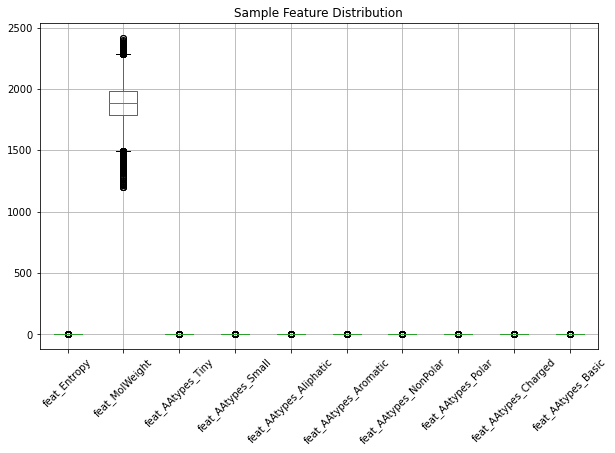

In [12]:
df[feat_cols].describe().T
plt.figure(figsize=(10, 6))
df[feat_cols[:10]].boxplot()  # Sample first 10 features
plt.title('Sample Feature Distribution')
plt.xticks(rotation=45)
plt.show()

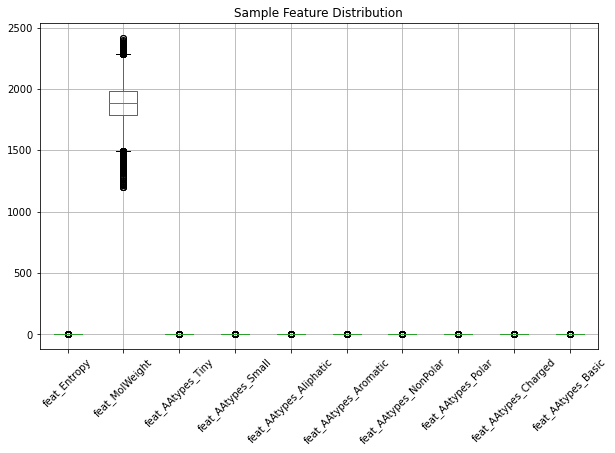

In [13]:
df[feat_cols].describe().T
plt.figure(figsize=(10, 6))
df[feat_cols[:10]].boxplot()  # Sample first 10 features
plt.title('Sample Feature Distribution')
plt.xticks(rotation=45)
plt.show()

In [14]:
from scipy.stats import zscore
z_scores = df[feat_cols].apply(zscore)
print((z_scores.abs() > 3).sum()[lambda x: x > 0])  # Features with outliers

feat_Entropy              729
feat_MolWeight            208
feat_AAtypes_Tiny         119
feat_AAtypes_Small         16
feat_AAtypes_Aliphatic    449
                         ... 
feat_esm2_1276            272
feat_esm2_1277            231
feat_esm2_1278            329
feat_esm2_1279            211
feat_esm2_1280            303
Length: 1601, dtype: int64


In [5]:
!pip install imbalanced-learn
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from imblearn.over_sampling import SMOTE
X = df.loc[:, df.columns.str.startswith('feat_')]
y = df['Class']

print(f"Original dataset shape: {X.shape}")
print(f"Original class distribution:\n{y.value_counts()}")

# Configure and apply SMOTE
# k_neighbors might need adjustment if you have fewer than 5 positive samples
smote = SMOTE(random_state=42, k_neighbors=4) 
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"\nResampled dataset shape: {X_resampled.shape}")
print(f"Resampled class distribution:\n{y_resampled.value_counts()}")

Original dataset shape: (45000, 1635)
Original class distribution:
-1    44668
 1      332
Name: Class, dtype: int64

Resampled dataset shape: (89336, 1635)
Resampled class distribution:
 1    44668
-1    44668
Name: Class, dtype: int64


In [7]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information scores for each feature
mi_scores = mutual_info_classif(X_resampled, y_resampled, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_resampled.columns, name='MI_Score')
mi_scores_series = mi_scores_series.sort_values(ascending=False)

# Select the top 200 features
top_k = 200
top_features = mi_scores_series.head(top_k).index.tolist()
X_reduced = X_resampled[top_features]

print(f"\nSelected top {top_k} features based on Mutual Information.")
print(f"Reduced feature set shape: {X_reduced.shape}")


Selected top 200 features based on Mutual Information.
Reduced feature set shape: (89336, 200)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# Configure a RandomForest that handles class imbalance
# This is crucial for Boruta's performance
rf_fast = RandomForestClassifier(
    n_jobs=-1,
    class_weight='balanced',
    max_depth=5,      # A reasonable depth
    random_state=42
)

# Initialize Boruta
# Boruta will find all features that are statistically more relevant than a random shuffle
# We combine a simpler model with a cap on iterations.
boruta_selector = BorutaPy(
    estimator=rf_fast,
    n_estimators='auto', # Let Boruta determine the number of trees
    max_iter=10,         # Cap the iterations to 50
    verbose=2,
    random_state=42
)

# Find support for the tentative features
boruta_selector.fit(X_reduced.values, y_resampled.values)

# Get the final list of selected features
final_features = X_reduced.columns[boruta_selector.support_].tolist()
X_final = X_reduced[final_features]

print("\nBoruta feature selection complete.")
print(f"Number of final features: {len(final_features)}")
print(f"Final feature set shape: {X_final.shape}")
print("\nFinal selected features:")
print(final_features)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	200
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	200
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	200
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	200
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	200
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	200
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	200
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	200
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 10
Confirmed: 	200
Tentative: 	0
Rejected: 	0

Boruta feature selection complete.
Number of final features: 200
Final feature set shape: (89336, 200)

Final selected features:
['feat_CTDD_prop6.G2.residue50', 'feat_Entropy', 'feat_CTDD_prop6.G2.residue100', 'feat_CTDD_prop6.G2.residue25', 'feat_CTDD_prop3.G1.residue75', 'feat_CTDD_prop6.G2.residue75', 'feat_CTDD_prop6.G2.residue0', 'feat_CTDD_prop1.G3.residue75', 'feat_CTDD_prop1.G3.residue50', 'feat_CTD

In [32]:

from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from boruta import BorutaPy



y_original = df['Class']
groups = df['Info_group']

# === STEP 2: APPLY FEATURE SELECTION ===
# **CRITICAL FIX:** We filter the ORIGINAL dataframe ('df') using the feature names
# you found with Boruta. This guarantees X_final has the same number of rows as y_original.
#
# This assumes 'final_features' (the list of names) exists from your previous cell.
try:
    X_final = df[final_features]
except NameError:
    print("FATAL ERROR: 'final_features' list not found. Please run the Boruta cell immediately before this one.")
    exit()

# **DEBUGGING CHECK:** These shapes must match.
print("The following data shapes must be consistent for cross-validation:")
print(f"  - Final Features (X_final): {X_final.shape}")
print(f"  - Final Target (y_original): {y_original.shape}")
print(f"  - Final Groups (groups):   {groups.shape}")
print("-" * 80)


# === STEP 3: CREATE AND EVALUATE THE FINAL MODEL PIPELINE ===
print("--- Starting GroupKFold Cross-Validation ---")
final_model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',  # Crucial for the imbalanced dataset
        random_state=42,
        n_jobs=-1
    ))
])

# Set up GroupKFold using the two groups in the dataset
gkf = GroupKFold(n_splits=2)
all_balanced_accuracies = []

# Loop through each fold for cross-validation
for i, (train_index, test_index) in enumerate(gkf.split(X_final, y_original, groups)):
    print(f"\n--- Fold {i+1}/2 ---")
    
    # Split data into training and testing sets for this fold
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_train, y_test = y_original.iloc[train_index], y_original.iloc[test_index]
    
    # Train the pipeline
    final_model_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = final_model_pipeline.predict(X_test)
    
    # --- Evaluation ---
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    all_balanced_accuracies.append(balanced_acc)
    print(f"Balanced Accuracy: {balanced_acc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# === STEP 4: FINAL SUMMARY ===
print("=" * 80)
print("\nCross-Validation Summary:")
print(f"Mean Balanced Accuracy across all folds: {np.mean(all_balanced_accuracies):.4f}")

The following data shapes must be consistent for cross-validation:
  - Final Features (X_final): (45000, 200)
  - Final Target (y_original): (45000,)
  - Final Groups (groups):   (45000,)
--------------------------------------------------------------------------------
--- Starting GroupKFold Cross-Validation ---

--- Fold 1/2 ---
Balanced Accuracy: 0.5000

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00     22324
           1       0.00      0.00      0.00       158

    accuracy                           0.99     22482
   macro avg       0.50      0.50      0.50     22482
weighted avg       0.99      0.99      0.99     22482


--- Fold 2/2 ---
Balanced Accuracy: 0.4998

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00     22344
           1       0.00      0.00      0.00       174

    accuracy                           0.99     22518
   ma

In [35]:
from sklearn.preprocessing import LabelEncoder
# Import the powerful XGBoost classifier
from xgboost import XGBClassifier

# --- This script assumes 'df' and 'final_feature_names' are already defined ---

# 1. Prepare Final Dataset
y_original = df['Class']
groups = df['Info_group']
X_final = df[final_features]

le = LabelEncoder()
y_final = le.fit_transform(y_original)
print(f"Original labels: {y_original.unique()}")
print(f"Labels mapped for XGBoost: {np.unique(y_final)}")

# Calculate scale_pos_weight for XGBoost's imbalanced data handling
# This should be the ratio of negative samples (now 0) to positive samples (1)
neg_count = np.sum(y_final == 0)
pos_count = np.sum(y_final == 1)
scale_pos_weight = neg_count / pos_count if pos_count > 0 else 1
print(f"Using scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")
print("-" * 80)


# === STEP 4: TRAIN AND EVALUATE FINAL XGBOOST MODEL ===
print("--- Final Model Training: Starting GroupKFold Cross-Validation ---")
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

gkf = GroupKFold(n_splits=2)
all_balanced_accuracies = []

for i, (train_index, test_index) in enumerate(gkf.split(X_final, y_final, groups)):
    print(f"\n--- Fold {i+1}/2 ---")
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_train, y_test = y_final[train_index], y_final[test_index]

    xgb_pipeline.fit(X_train, y_train)
    y_pred = xgb_pipeline.predict(X_test)

    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    all_balanced_accuracies.append(balanced_acc)
    print(f"Balanced Accuracy: {balanced_acc:.4f}\n")
    print("Classification Report (0 = non-epitope, 1 = epitope):")
    print(classification_report(y_test, y_pred, zero_division=0))

# === STEP 5: FINAL SUMMARY ===
print("=" * 80)
print("\nCross-Validation Complete.")
print(f"Mean Balanced Accuracy across all folds: {np.mean(all_balanced_accuracies):.4f}")








Original labels: [-1  1]
Labels mapped for XGBoost: [0 1]
Using scale_pos_weight for XGBoost: 134.54
--------------------------------------------------------------------------------
--- Final Model Training: Starting GroupKFold Cross-Validation ---

--- Fold 1/2 ---


C:\Users\Garvit\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [04:10:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Balanced Accuracy: 0.5410

Classification Report (0 = non-epitope, 1 = epitope):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22324
           1       0.65      0.08      0.15       158

    accuracy                           0.99     22482
   macro avg       0.82      0.54      0.57     22482
weighted avg       0.99      0.99      0.99     22482


--- Fold 2/2 ---


C:\Users\Garvit\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [04:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Balanced Accuracy: 0.5592

Classification Report (0 = non-epitope, 1 = epitope):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22344
           1       0.28      0.12      0.17       174

    accuracy                           0.99     22518
   macro avg       0.64      0.56      0.58     22518
weighted avg       0.99      0.99      0.99     22518


Cross-Validation Complete.
Mean Balanced Accuracy across all folds: 0.5501


In [9]:
from sklearn.model_selection import GroupKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, classification_report, make_scorer
from xgboost import XGBClassifier

# --- This script assumes 'df' and 'final_feature_names' are already defined ---

# 1. Prepare Data
y_original = df['Class']
groups = df['Info_group']
X_final = df[final_features]

# Map labels from {-1, 1} to {0, 1} for XGBoost
le = LabelEncoder()
y_final = le.fit_transform(y_original)

# Calculate scale_pos_weight
scale_pos_weight = np.sum(y_final == 0) / np.sum(y_final == 1)

# 2. Define the Hyperparameter Search Space
# We are creating a 'dictionary' of parameters to test.
param_dist = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# 3. Create the XGBoost Pipeline
# The 'xgb__' prefix is used to tell the pipeline which component to apply the parameters to.
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# 4. Set up Randomized Search with GroupKFold
# We use GroupKFold for the outer loop to respect the data dependencies.
gkf = GroupKFold(n_splits=2)

# We will optimize for balanced_accuracy
scorer = make_scorer(balanced_accuracy_score)

# n_iter=20 will test 20 random combinations from your param_dist.
# This is a good starting point for a balance of search time and thoroughness.
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring=scorer,
    cv=gkf,  # Use GroupKFold for the inner cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("--- Starting Hyperparameter Tuning with RandomizedSearchCV ---")
# Fit the search on your full dataset
random_search.fit(X_final, y_final, groups=groups)

# 5. Show the Best Results
print("\n--- Tuning Complete ---")
print(f"Best Balanced Accuracy Score Found: {random_search.best_score_:.4f}")
print("\nBest Parameters Found:")
print(random_search.best_params_)

--- Starting Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\Garvit\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [05:02:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Tuning Complete ---
Best Balanced Accuracy Score Found: 0.6710

Best Parameters Found:
{'xgb__subsample': 0.8, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.8}


In [12]:

from sklearn.metrics import balanced_accuracy_score, classification_report, make_scorer, precision_recall_curve, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
# We need the imblearn pipeline for the FINAL evaluation step
from imblearn.pipeline import Pipeline as ImbPipeline

# --- STEP 1: LOAD AND PREPARE DATA ---

y_original = df['Class']
groups = df['Info_group']
X_final = df[final_features]

le = LabelEncoder()
y_final = le.fit_transform(y_original)
print("Data loaded and prepared.")
print("-" * 80)


# --- STEP 2: HYPERPARAMETER TUNING (WITHOUT ADASYN IN PIPELINE) ---
print("--- Starting Hyperparameter Tuning ---")
# Define the search space
param_dist = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__learning_rate': [0.01, 0.05, 0.1]
}

# Calculate scale_pos_weight for XGBoost to handle imbalance during the search
scale_pos_weight = np.sum(y_final == 0) / np.sum(y_final == 1)

# Create a pipeline *without* the ADASYN step for the search
search_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        scale_pos_weight=scale_pos_weight, # Handle imbalance this way for the search
        random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'
    ))
])

# Set up the search
gkf = GroupKFold(n_splits=2)
scorer = make_scorer(balanced_accuracy_score)
random_search = RandomizedSearchCV(
    estimator=search_pipeline, param_distributions=param_dist,
    n_iter=15, scoring=scorer, cv=gkf, verbose=1, random_state=42, n_jobs=-1
)

# Run the search to find the best parameters
random_search.fit(X_final, y_final, groups=groups)

best_params = random_search.best_params_
print("\n--- Tuning Complete ---")
print(f"Best Balanced Accuracy Score Found: {random_search.best_score_:.4f}")
print("\nBest Parameters Found:")
# We need to strip the 'xgb__' prefix for the next step
final_params = {key.replace('xgb__', ''): value for key, value in best_params.items()}
print(final_params)
print("-" * 80)


# --- STEP 3: EVALUATE THE FINAL MODEL (WITH ADASYN AND BEST PARAMS) ---
print("\n--- Evaluating Best Model with ADASYN and Optimal Threshold ---")
# Create the final pipeline using the imblearn pipeline and the best parameters found
final_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(random_state=42)),
    # Pass the best parameters to the final classifier
    ('xgb', XGBClassifier(
        random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss', **final_params
    ))
])

all_f1_scores = []
all_balanced_accuracies = []

for i, (train_index, test_index) in enumerate(gkf.split(X_final, y_final, groups)):
    print(f"\n--- Fold {i+1}/2 ---")
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_train, y_test = y_final[train_index], y_final[test_index]

    final_pipeline.fit(X_train, y_train)
    y_pred_probs = final_pipeline.predict_proba(X_test)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
    f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold for this fold: {best_threshold:.4f}")

    y_pred_final = (y_pred_probs >= best_threshold).astype(int)
    all_f1_scores.append(f1_score(y_test, y_pred_final))
    all_balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred_final))

    print("\nFinal Classification Report (with optimal threshold):")
    print(classification_report(y_test, y_pred_final, zero_division=0))

# --- 4. FINAL SUMMARY ---
print("=" * 80)
print("\nFinal Model Performance Summary:")
print(f"Mean Balanced Accuracy (with optimal threshold): {np.mean(all_balanced_accuracies):.4f}")
print(f"Mean F1-Score for Positive Class (with optimal threshold): {np.mean(all_f1_scores):.4f}")

Data loaded and prepared.
--------------------------------------------------------------------------------
--- Starting Hyperparameter Tuning ---
Fitting 2 folds for each of 15 candidates, totalling 30 fits


C:\Users\Garvit\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [05:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Tuning Complete ---
Best Balanced Accuracy Score Found: 0.6751

Best Parameters Found:
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
--------------------------------------------------------------------------------

--- Evaluating Best Model with ADASYN and Optimal Threshold ---

--- Fold 1/2 ---


C:\Users\Garvit\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [05:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal Threshold for this fold: 0.5684

Final Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22324
           1       0.15      0.08      0.11       158

    accuracy                           0.99     22482
   macro avg       0.57      0.54      0.55     22482
weighted avg       0.99      0.99      0.99     22482


--- Fold 2/2 ---


C:\Users\Garvit\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [05:27:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal Threshold for this fold: 0.7874

Final Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22344
           1       0.19      0.10      0.13       174

    accuracy                           0.99     22518
   macro avg       0.59      0.55      0.56     22518
weighted avg       0.99      0.99      0.99     22518


Final Model Performance Summary:
Mean Balanced Accuracy (with optimal threshold): 0.5448
Mean F1-Score for Positive Class (with optimal threshold): 0.1204


In [14]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/5c/5e/068798a8c7087863e7772e9363a880ab13fe55a5a7ede8ec42fab8a1acbb/optuna-4.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/54/7e/ac0991d1745f7d755fc1cd381b3990a45b404b4d008fc75e2a983516fbfe/alembic-1.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/e3/51/9b208e85196941db2f0654ad0357ca6388ab3ed67efdbfc799f35d1f83aa/colorlog-6.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/87/fb/99f81ac72ae23375f22b7afdb7642aba97c00a713c217124420147681a2f/mako-1.3.10-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3

In [15]:
import optuna
from sklearn.metrics import balanced_accuracy_score

# --- This code replaces your RandomizedSearchCV block ---

# 1. Define the objective function for Optuna to optimize
def objective(trial):
    # Define the search space within the function
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }

    # Create the full pipeline with ADASYN and XGBoost
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('adasyn', ADASYN(random_state=42)),
        ('xgb', XGBClassifier(random_state=42, n_jobs=-1, **params))
    ])

    # Manual cross-validation loop
    scores = []
    gkf = GroupKFold(n_splits=2)
    for train_index, test_index in gkf.split(X_final, y_final, groups=groups):
        X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
        y_train, y_test = y_final[train_index], y_final[test_index]

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        scores.append(balanced_accuracy_score(y_test, preds))

    return np.mean(scores)


study = optuna.create_study(direction='maximize')
# n_trials=30 will test 30 intelligent combinations.
study.optimize(objective, n_trials=30)

# 3. Print the best results
print("\n--- Optuna Tuning Complete ---")
print(f"Best Balanced Accuracy Score Found: {study.best_value:.4f}")
print("\nBest Parameters Found:")
print(study.best_params)

[I 2025-07-25 05:31:18,013] A new study created in memory with name: no-name-74765366-3076-4407-a683-2b0f96e74d85
[I 2025-07-25 05:31:28,552] Trial 0 finished with value: 0.5380547573707262 and parameters: {'n_estimators': 135, 'max_depth': 5, 'learning_rate': 0.03810057823702595, 'subsample': 0.7392725134542437, 'colsample_bytree': 0.948235552743249}. Best is trial 0 with value: 0.5380547573707262.
[I 2025-07-25 05:31:44,593] Trial 1 finished with value: 0.547530209562233 and parameters: {'n_estimators': 174, 'max_depth': 6, 'learning_rate': 0.018405397085269885, 'subsample': 0.7490465955148484, 'colsample_bytree': 0.9293129436100824}. Best is trial 1 with value: 0.547530209562233.
[I 2025-07-25 05:32:02,526] Trial 2 finished with value: 0.5292393667289721 and parameters: {'n_estimators': 242, 'max_depth': 5, 'learning_rate': 0.0758085580675238, 'subsample': 0.8682079921265471, 'colsample_bytree': 0.9076715980492622}. Best is trial 1 with value: 0.547530209562233.
[I 2025-07-25 05:32:

[I 2025-07-25 05:37:13,080] Trial 28 finished with value: 0.5796635244813589 and parameters: {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.006787201032529856, 'subsample': 0.7238016993088291, 'colsample_bytree': 0.7498518819687944}. Best is trial 22 with value: 0.5941917669056735.
[I 2025-07-25 05:37:34,494] Trial 29 finished with value: 0.5308887973738049 and parameters: {'n_estimators': 319, 'max_depth': 7, 'learning_rate': 0.048662413774042755, 'subsample': 0.6891544368526749, 'colsample_bytree': 0.7940961127742785}. Best is trial 22 with value: 0.5941917669056735.



--- Optuna Tuning Complete ---
Best Balanced Accuracy Score Found: 0.5942

Best Parameters Found:
{'n_estimators': 259, 'max_depth': 3, 'learning_rate': 0.005851955500344209, 'subsample': 0.6451199728572943, 'colsample_bytree': 0.7455237358299013}


In [17]:
import optuna
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import f1_score, classification_report, balanced_accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import precision_recall_curve


y_original = df['Class']
groups = df['Info_group']
le = LabelEncoder()
y_final = le.fit_transform(y_original)

print("--- Starting Optuna Tuning (Objective: Maximize F1-Score with Regularization) ---")

def objective(trial):
   
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 600),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'lambda': trial.suggest_float('lambda', 1.0, 10.0, log=True), # L2 Regularization
        'alpha': trial.suggest_float('alpha', 0, 5.0) # L1 Regularization
    }
    
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('adasyn', ADASYN(random_state=42)),
        ('xgb', XGBClassifier(random_state=42, n_jobs=-1, **params))
    ])
    
    scores = []
    gkf = GroupKFold(n_splits=2)
    for train_index, test_index in gkf.split(X_final, y_final, groups=groups):
        X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
        y_train, y_test = y_final[train_index], y_final[test_index]
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        scores.append(f1_score(y_test, preds, pos_label=1))
        
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40) 
final_params = study.best_params

print("\n--- Optuna Tuning Complete ---")
print(f"Best F1-Score Found: {study.best_value:.4f}")
print("\nBest Parameters Found:")
print(final_params)
print("-" * 80)


print("\n--- Evaluating Best Regularized Model with Optimal Threshold ---")
final_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, n_jobs=-1, **final_params))
])

all_f1_scores = []
all_balanced_accuracies = []
gkf_final = GroupKFold(n_splits=2)

for i, (train_index, test_index) in enumerate(gkf_final.split(X_final, y_final, groups)):
    print(f"\n--- Fold {i+1}/2 ---")
    X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_train, y_test = y_final[train_index], y_final[test_index]

    final_pipeline.fit(X_train, y_train)
    y_pred_probs = final_pipeline.predict_proba(X_test)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
    f1s = (2 * precision * recall) / (precision + recall + 1e-9)
    best_threshold = thresholds[np.argmax(f1s)]
    print(f"Optimal Threshold for this fold: {best_threshold:.4f}")
    
    y_pred_final = (y_pred_probs >= best_threshold).astype(int)
    all_f1_scores.append(f1_score(y_test, y_pred_final, pos_label=1))
    all_balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred_final))

    print("\nFinal Classification Report (with optimal threshold):")
    print(classification_report(y_test, y_pred_final, zero_division=0))

print("=" * 80)
print("\nFinal Model Performance Summary:")
print(f"Mean Balanced Accuracy: {np.mean(all_balanced_accuracies):.4f}")
print(f"Mean F1-Score (Positive Class): {np.mean(all_f1_scores):.4f}")

[I 2025-07-25 06:08:25,562] A new study created in memory with name: no-name-44e348cc-5cc9-40ca-8107-0887a299def5


--- Starting Optuna Tuning (Objective: Maximize F1-Score with Regularization) ---


[I 2025-07-25 06:08:38,092] Trial 0 finished with value: 0.1838476508201279 and parameters: {'n_estimators': 594, 'max_depth': 5, 'learning_rate': 0.0053908191963710494, 'subsample': 0.6795996525372607, 'colsample_bytree': 0.6359233229739005, 'gamma': 5.958085789695352, 'lambda': 7.5912783302446805, 'alpha': 0.5269557196196872}. Best is trial 0 with value: 0.1838476508201279.
[I 2025-07-25 06:08:43,426] Trial 1 finished with value: 0.16177227635037914 and parameters: {'n_estimators': 402, 'max_depth': 3, 'learning_rate': 0.01715722372627544, 'subsample': 0.6254044836750902, 'colsample_bytree': 0.9250546349188973, 'gamma': 0.8758975212434361, 'lambda': 6.07119625115786, 'alpha': 1.7517794860028668}. Best is trial 0 with value: 0.1838476508201279.
[I 2025-07-25 06:09:01,029] Trial 2 finished with value: 0.20262783677914226 and parameters: {'n_estimators': 595, 'max_depth': 6, 'learning_rate': 0.005418989963775516, 'subsample': 0.9410509192713203, 'colsample_bytree': 0.9042745660321894, '

[I 2025-07-25 06:11:40,963] Trial 22 finished with value: 0.34950852308075153 and parameters: {'n_estimators': 527, 'max_depth': 5, 'learning_rate': 0.026927421596894395, 'subsample': 0.8110962615041424, 'colsample_bytree': 0.7400427642068348, 'gamma': 4.650000029801672, 'lambda': 6.739325059309178, 'alpha': 0.15170643152379637}. Best is trial 22 with value: 0.34950852308075153.
[I 2025-07-25 06:11:55,442] Trial 23 finished with value: 0.3496412666996537 and parameters: {'n_estimators': 539, 'max_depth': 5, 'learning_rate': 0.026945190432002563, 'subsample': 0.879409084237547, 'colsample_bytree': 0.7518408744918611, 'gamma': 5.003324264417698, 'lambda': 7.093218520829722, 'alpha': 0.15195263119493796}. Best is trial 23 with value: 0.3496412666996537.
[I 2025-07-25 06:12:08,312] Trial 24 finished with value: 0.34565064605071094 and parameters: {'n_estimators': 552, 'max_depth': 5, 'learning_rate': 0.025986401499396596, 'subsample': 0.8896261477114624, 'colsample_bytree': 0.8158342007112


--- Optuna Tuning Complete ---
Best F1-Score Found: 0.3580

Best Parameters Found:
{'n_estimators': 546, 'max_depth': 5, 'learning_rate': 0.02509043662632323, 'subsample': 0.8819035050967043, 'colsample_bytree': 0.8168270289163001, 'gamma': 5.6397345557151395, 'lambda': 8.567438858981605, 'alpha': 0.471326008635036}
--------------------------------------------------------------------------------

--- Evaluating Best Regularized Model with Optimal Threshold ---

--- Fold 1/2 ---
Optimal Threshold for this fold: 0.7252

Final Classification Report (with optimal threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22324
           1       0.70      0.46      0.56       158

    accuracy                           0.99     22482
   macro avg       0.85      0.73      0.78     22482
weighted avg       0.99      0.99      0.99     22482


--- Fold 2/2 ---
Optimal Threshold for this fold: 0.5559

Final Classification Report (with o